### Excercise 2.11

![Parameter Comparison](images/parameter_comparison.png)

Make a figure analogous to the one above for the nonstationary case outlined in Exercise 2.5. Include the constant-step-size $\epsilon$-greedy algorithm with $\alpha$ = 0.1. Use runs of 200,000 steps and, as a performance measure for each algorithm and parameter setting, use the average reward over the last 100,000 steps.

In [5]:
import matplotlib.pyplot as plt
from bandit import Bandit
from bandit_solver import BanditSolver
import numpy as np

arms = 10
q_stars = [np.random.randint(0, 2) for _ in range(arms)]

s_bandit = [Bandit(arms=arms, q_star=q_stars, bandit_type='stationary')]*100
ns_bandit = [Bandit(arms=arms, q_star=q_stars, bandit_type='non-stationary')]*100

In [22]:
m = {1:'EG_SAMP',
     2:'EG_CONST',
     3:'G_OPT',
     4:'UCB', 
     5:'GRAD'}

bs = [BanditSolver(bandit=s_bandit[i], max_iters=10000) for i in range(100) ]
bns = [BanditSolver(bandit=ns_bandit[i], max_iters=10000) for i in range(100)]

# solve using method 1
#i = 1
#rs, ps = bs.solve(method=m[i], epsilon=0.1)
#rns, pns = bns.solve(method=m[i], epsilon=0.1)

# solve using method 2
#i = 2
#rs, ps = bs.solve(method=m[i], epsilon=0.1, alpha=0.1)
#rns, pns = bns.solve(method=m[i], epsilon=0.1, alpha=0.1)

# solve using method 3
#i = 3
#rs, ps = bs.solve(method=m[i], Q_init=np.array([20]*10), alpha=0.1)
#rns, pns = bns.solve(method=m[i], Q_init=np.array([20]*10), alpha=0.1)

# solve using method 4
i=4
X = np.array([bs[j].solve(method=m[i], confidence=2) for j in range(100)])
rs = X[:, 0, :]
ps = X[:, 1, :]
rs = np.mean(rs, axis=0)
ps = np.mean(ps, axis=0)
Y = np.array([bns[j].solve(method=m[i], confidence=2) for j in range(100)])
rns = Y[:, 0, :]
pns = Y[:, 1, :]
rns = np.mean(rns, axis=0)
pns = np.mean(pns, axis=0)

# solve using method 5
#i=5
#rs, ps = bs.solve(method=m[i], epsilon=0.1)
#rns, pns = bns.solve(method=m[i], epsilon=0.1)

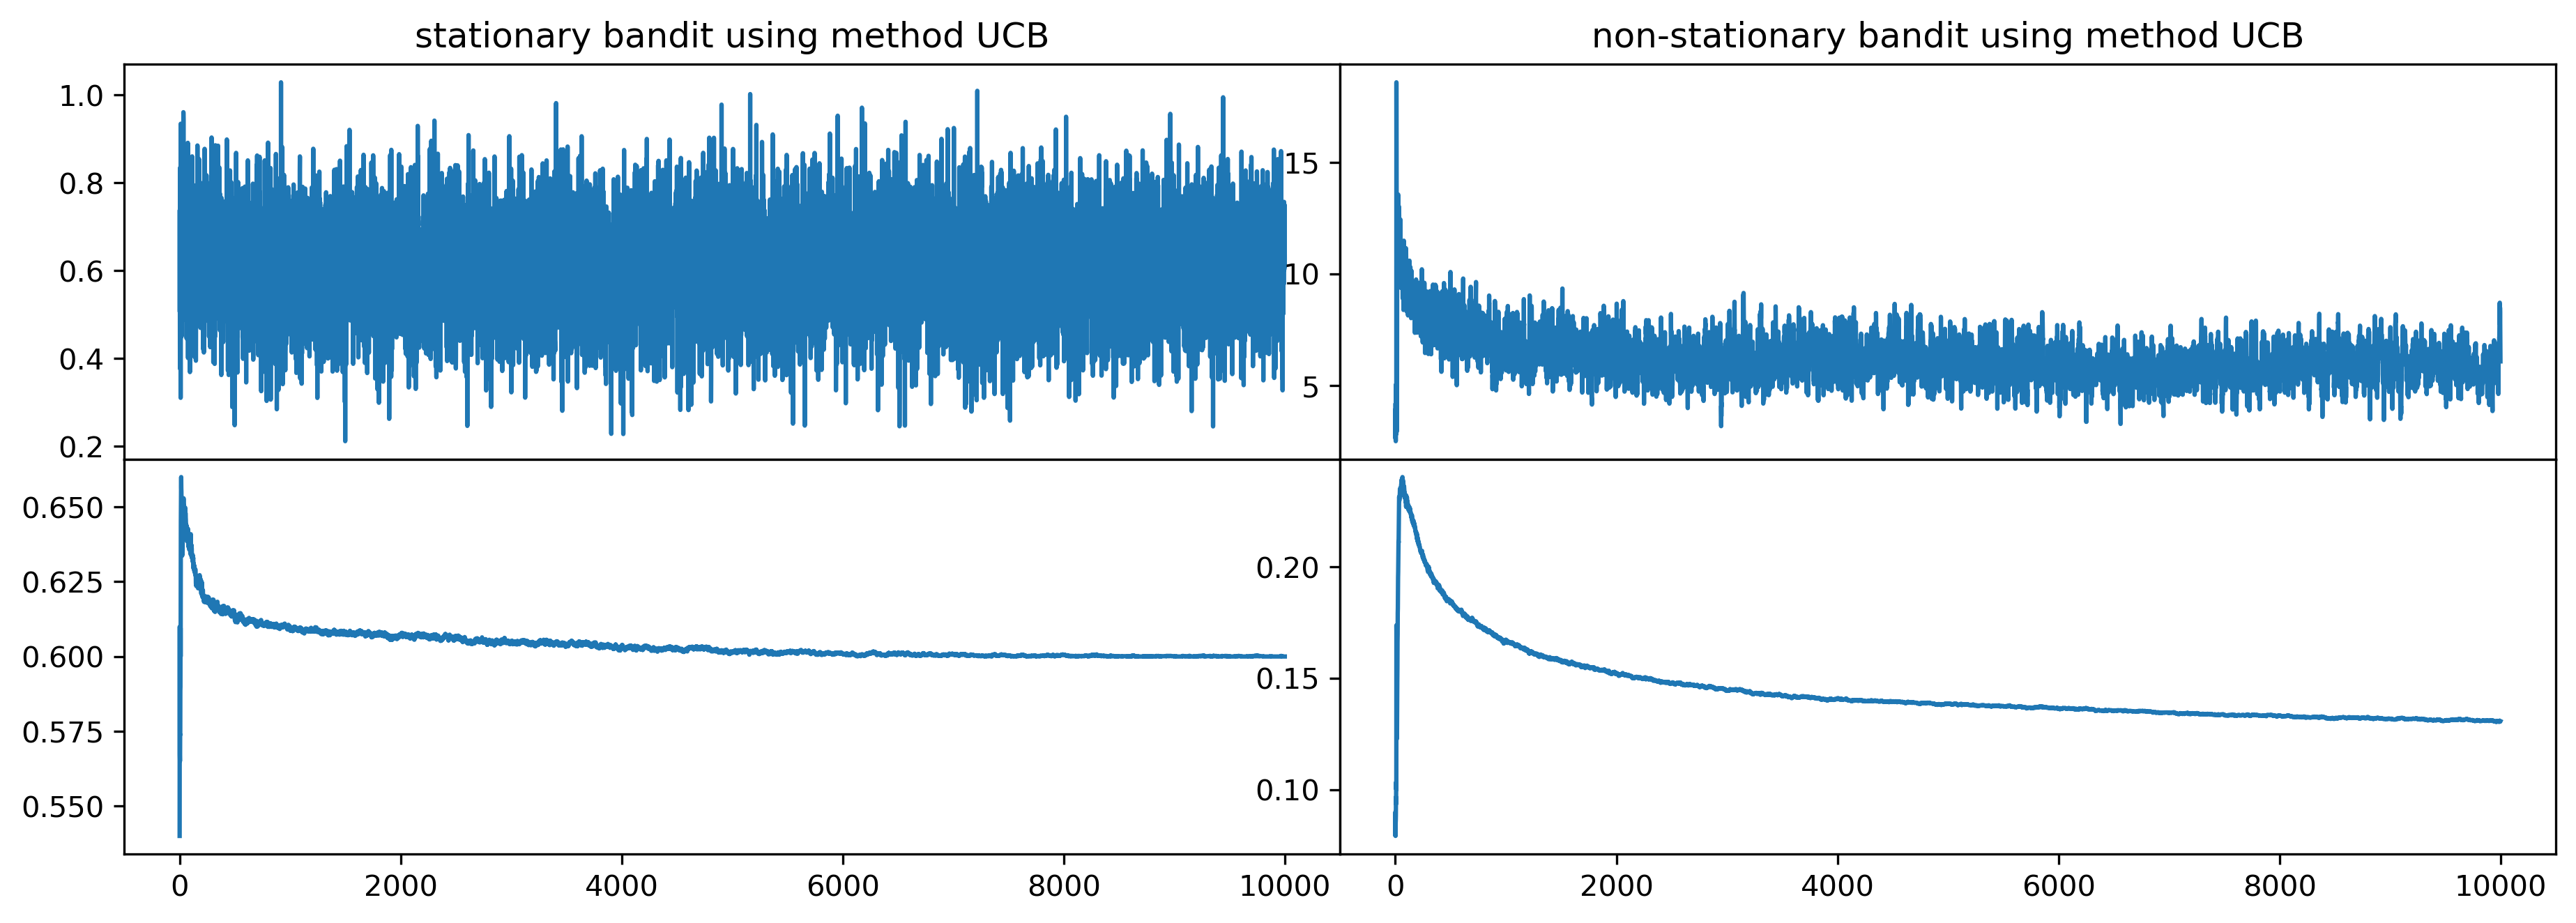

In [23]:
fig = plt.figure(dpi=300, figsize=(15, 5))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)

#(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
(ax1, ax2), (ax3, ax4) = gs.subplots()
ax1.set_title(f'stationary bandit using method {m[i]}')
ax1.plot(rs)
ax3.plot(ps)

ax2.set_title(f'non-stationary bandit using method {m[i]}')
ax2.plot(rns)
ax4.plot(pns)

plt.show()